# FLEET OPERATIONS PROJECT

## Project Overview

This project is designed to help Butali Sugar mills Limited manage it`s fleet effectively. The project is developed with the transport department of the said comapny in mind. The comapny has several vehicles that are being managed by the transport department. For the smooth running of the company processes, every department needs to work optimally, transport department included. The project aims at making sure the fleets are utilised in a manner that serves their purpose effectively.

## Problem Statement

The comapny having a huge fleet, makes it hard to handle and manage them cassually. There needs to be a system that helps to manage the same. The project at hand aims to adress some of the challenges that the department could otherwise face on fleet management. The project aims to do the following.

1. Monitor Fuel, maintainance and Insurance expenses for the fleets. This helps us to determine the units that are prooving expensive to own
2. Monitor fuel effieciency, Vehicle downtime and maintainace frequencies. This is critical for pinpointing units that are less efficient.
3. Assess the quality of maintaince products from different suppliers. Spare parts of good quality are more durable and therefore we aim to identify which suppliers and parts are to be ordered

In [13]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## DATA UNDERSTANDING

The Data we are using for this project has been sourced from the internet with the help of AI tools. I fed it with instructions of columns that I would like in my dataset and helped refine the values. The data therefore does not represent the real picture on the ground. The dataset has 2000 rows and 14 columns. The columns represent different features such as `Vehicle type, part name, supplier, Issue_reported, Fuel_consumed, Cost of ownership` etc. From the overall summary of the data, we see Float and Object present as the data type. The numerical columns are 5 while the categorical ones are 9 in total. 

In [14]:
#Load and preview the data
df= pd.read_csv("fleet_operations_1.csv")
df.head()

,Number_Plate,Vehicle_Type,Model,Part_Name,Category,Supplier,Purchase_Cost,Service_Date,Issue_Reported,Service_Type,Fuel_Consumed_Litres,Distance_Covered_KM,Insurance_Cost,Cost_of_Ownership
0,KTCA 869H,Tractor,TS 6000,Alternator,Electrical,JKT,10743.00,08-02-25,Electrical failure,Emergency,128.68,473.41,18649.72,47172.93
1,KTCA 276F,Tractor,TT 490,Oil Filter,Engine,AutoGen_3,12084.84,04-10-24,Reduced engine performance,Preventive,158.94,653.48,23546.53,49502.39
2,KTCA 581F,Tractor,TT 490,Alternator,Electrical,AutoGen_8,10736.14,04-11-24,No power output,Breakdown,457.85,1938.07,15012.45,31148.18
3,KTCA 611E,Tractor,TS 6000,Alternator,Electrical,AutoGen_10,1725.43,22-07-24,No power output,Breakdown,167.20,785.78,21175.01,31810.11
4,KTCC 778C,Tractor,TS 6110,Hydraulic Pump,Hydraulics,JKT,2903.60,09-07-24,Hydraulic issue,Preventive,163.04,494.82,28576.05,39917.22


In [15]:
# Check for the structure of the data
df.shape

(2000, 14)

In [16]:
#Check the column names of the   
df.columns

Index(['Number_Plate', 'Vehicle_Type', 'Model', 'Part_Name', 'Category',
       'Supplier', 'Purchase_Cost', 'Service_Date', 'Issue_Reported',
       'Service_Type', 'Fuel_Consumed_Litres', 'Distance_Covered_KM',
       'Insurance_Cost', 'Cost_of_Ownership'],
      dtype='object')

In [17]:
# Check the overall summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number_Plate          2000 non-null   object 
 1   Vehicle_Type          2000 non-null   object 
 2   Model                 2000 non-null   object 
 3   Part_Name             2000 non-null   object 
 4   Category              2000 non-null   object 
 5   Supplier              2000 non-null   object 
 6   Purchase_Cost         2000 non-null   float64
 7   Service_Date          2000 non-null   object 
 8   Issue_Reported        2000 non-null   object 
 9   Service_Type          2000 non-null   object 
 10  Fuel_Consumed_Litres  2000 non-null   float64
 11  Distance_Covered_KM   2000 non-null   float64
 12  Insurance_Cost        2000 non-null   float64
 13  Cost_of_Ownership     2000 non-null   float64
dtypes: float64(5), object(9)
memory usage: 218.9+ KB


In [18]:
# Check the statiscal summmary
df.describe()

,Purchase_Cost,Fuel_Consumed_Litres,Distance_Covered_KM,Insurance_Cost,Cost_of_Ownership
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,8367.711845,274.081440,1050.19967,17544.565110,38272.866165
std,4917.070495,200.005354,543.57157,7239.360388,9827.445765
min,1002.080000,2.770000,101.14000,5013.510000,13451.720000
25%,4774.432500,118.697500,586.37000,11298.700000,31157.925000
50%,7949.535000,241.230000,1053.86000,17516.245000,37836.185000
75%,11476.885000,391.290000,1504.24500,23914.725000,45180.057500
max,49116.030000,1672.780000,1996.07000,29991.720000,76952.110000


## DATA CLEANING 

In this chapter we aim to clean our data before proceeding with analysis. The core focus is checking for null values and duplicates. Null values can be handled by dropping the entire row or by filling them with mean or mode of the column. Duplicates are dropped so as to get the correct represantation of features during analysis. From the code below, we see that we do not have any null values. There are no duplicates in our data too. We can therefore proceed to the next step

In [19]:
# Check for null values
df.isnull().sum()

Number_Plate            0
Vehicle_Type            0
Model                   0
Part_Name               0
Category                0
Supplier                0
Purchase_Cost           0
Service_Date            0
Issue_Reported          0
Service_Type            0
Fuel_Consumed_Litres    0
Distance_Covered_KM     0
Insurance_Cost          0
Cost_of_Ownership       0
dtype: int64

In [20]:
# Check for duplicates
df.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

In this section, we visualize different feature relationships. we aim to uncover the trends our our data at this point. Often, this is where we decide on the model that we will use for our project depending on the results of the visualizations.

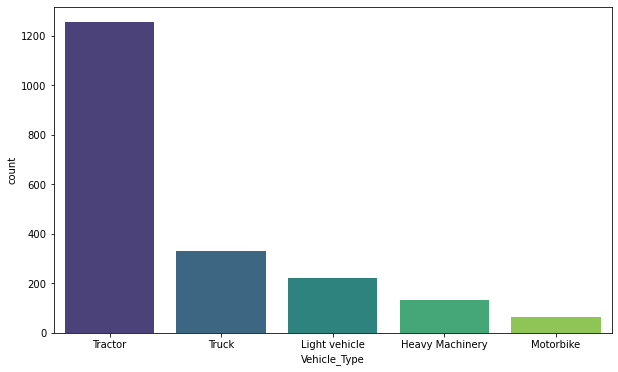

In [21]:
# Check all the vehicle types in the fleet
plt.figure(figsize=(10,6))  
sns.countplot(data=df, x='Vehicle_Type', palette='viridis');

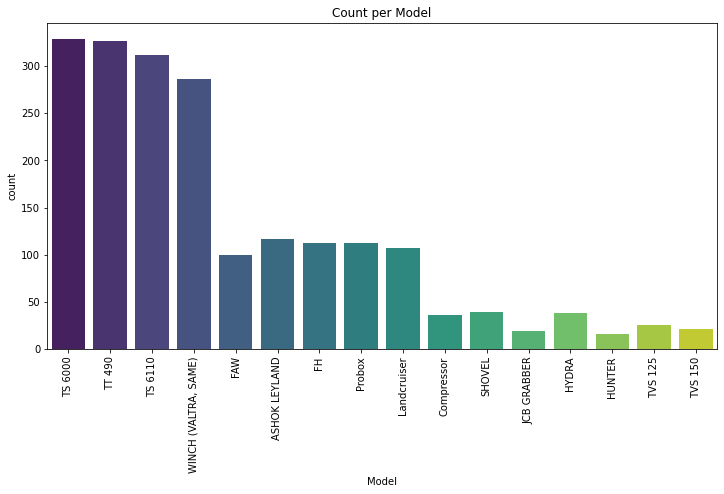

In [59]:
# Check the models present in the fleet
plt.figure(figsize=(12,6))
sns.countplot(data=df, x ='Model', palette='viridis')
plt.xticks(rotation=90)
plt.title("Count per Model");

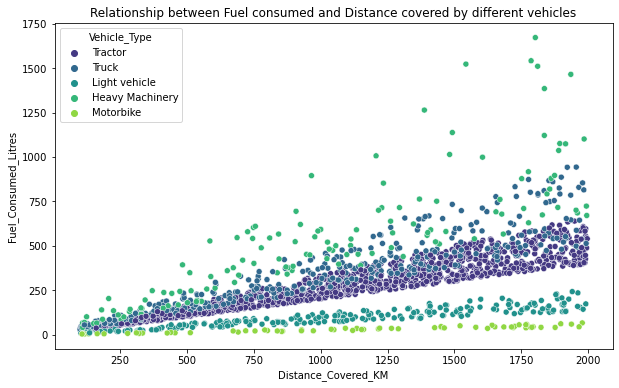

In [62]:
# Check the relationship between vehicle distance and fuel consumption
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Distance_Covered_KM', y='Fuel_Consumed_Litres', hue='Vehicle_Type', palette='viridis')
plt.title("Relationship between Fuel consumed and Distance covered by different vehicles");

In [ ]:
# Convert the date column to date
df['Service_Date']= pd.to_datetime(df['Service_Date'], errors='coerce')
#Extract months from the date 
df['Month']=df['Service_Date'].dt.strftime('%B')

Text(0.5, 1.0, 'Issues Reported among Different Models')

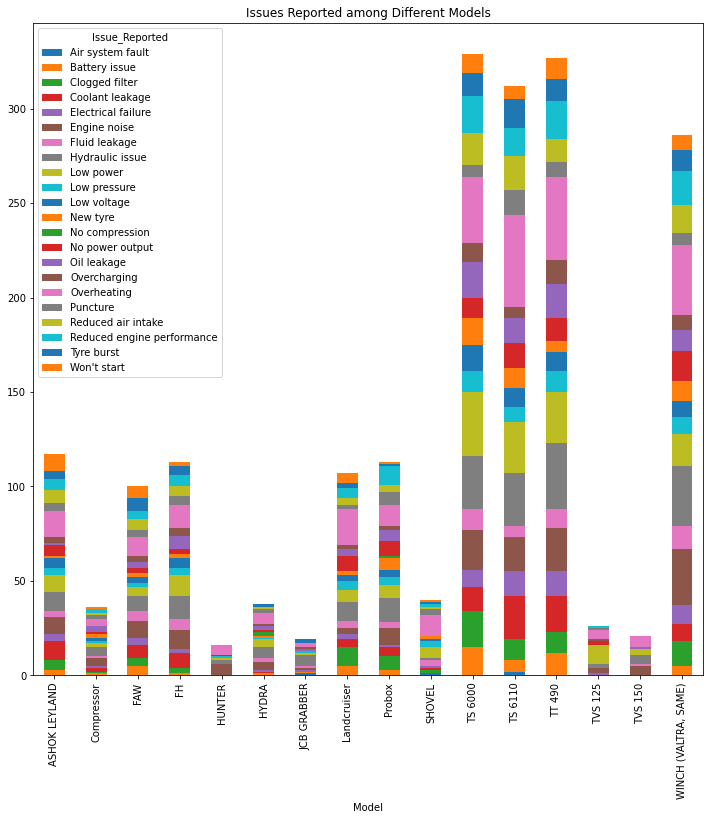

In [63]:
# Group Model with issue reported
crossplot = pd.crosstab(df['Model'], df['Issue_Reported'])
# Plot the visualization for the same
crossplot.plot(kind='bar', stacked=True, figsize=(12,12))
plt.title("Issues Reported among Different Models")

In [ ]:
# Bin the cost of ownership column for easy visualization
bins= [10000, 30000, 50000, float('inf')]
labels= ['low', 'medium', 'high']

Costing=pd.cut(df['Cost_of_Ownership'], bins=bins, labels=labels)

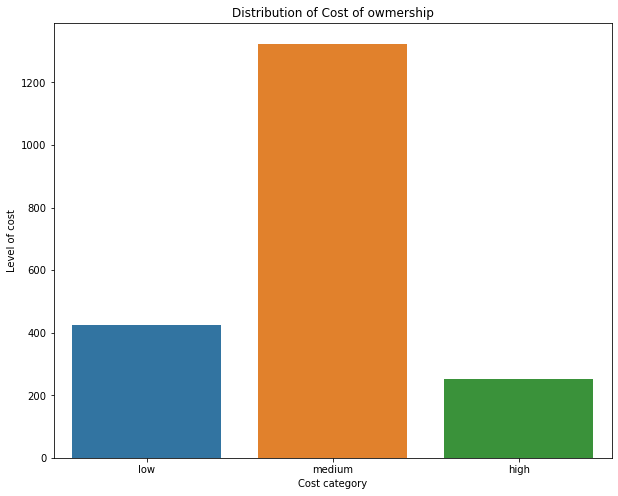

In [ ]:
# Check the distribution of the cost of ownership
plt.figure(figsize=(10,8))
sns.countplot(x=Costing, data=df)
plt.title('Distribution of Cost of owmership')
plt.xlabel('Cost category')
plt.ylabel('Level of cost');

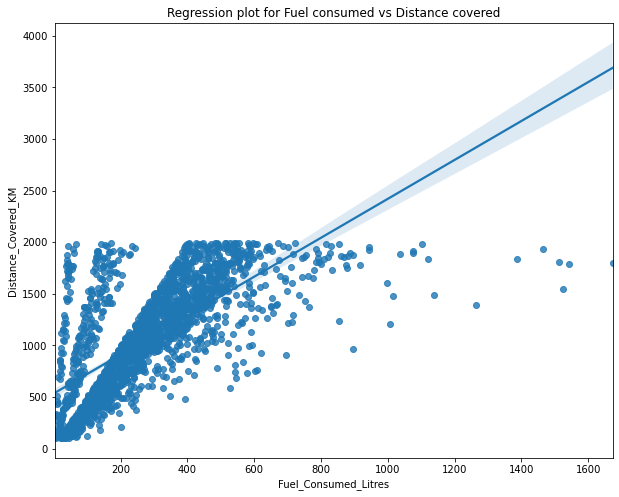

In [ ]:
# Plot a regression plot to inspect for linear properties
plt.figure(figsize=(10,8))
sns.regplot(x='Fuel_Consumed_Litres',y='Distance_Covered_KM',data=df)
plt.title('Regression plot for Fuel consumed vs Distance covered');

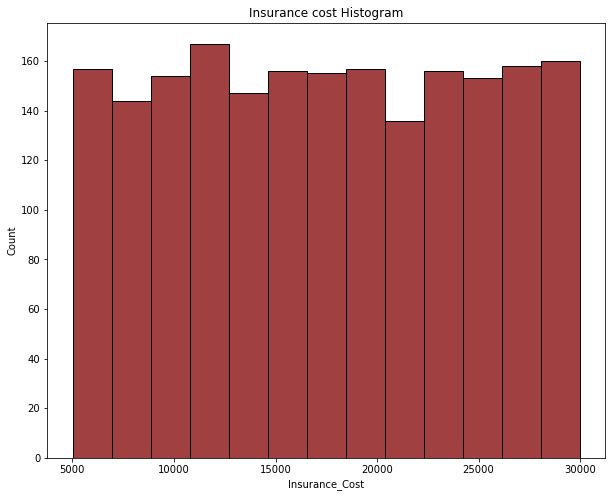

In [73]:
# Chcek for the distribution of insurance cost
plt.figure(figsize=(10,8))
sns.histplot(df['Insurance_Cost'],color="maroon")
plt.title("Insurance cost Histogram");

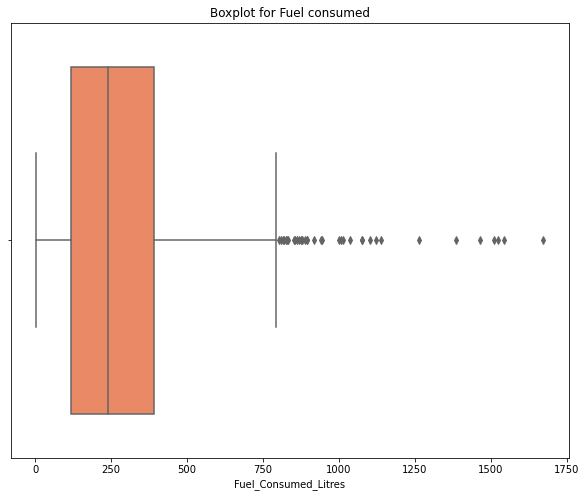

In [75]:
# Check for outliers in Fuel consumed
plt.figure(figsize=(10,8),)
sns.boxplot(x=df['Fuel_Consumed_Litres'], color="coral")
plt.title('Boxplot for Fuel consumed');